In [45]:
from intrinsic.module import PlasticEdges
from intrinsic.model import Intrinsic
import numpy as np
import torch
from matplotlib import pyplot as plt

In [56]:
rnet = Intrinsic(num_nodes=3, node_shape=(1, 3, 5, 5), kernel_size=3, edge_module=PlasticEdges, track_activation_history=True, mask=None, inject_noise=False)

Using kernel 3  and pad 1


In [57]:
for i in range(1000):
    rnet()

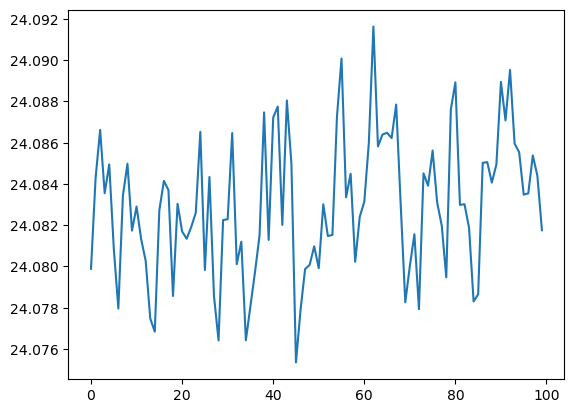

In [76]:
history = rnet.past_states
history = np.array([s.detach().squeeze().numpy() for s in history])
plt.plot(history[100:, 2, 0, 1, 1])

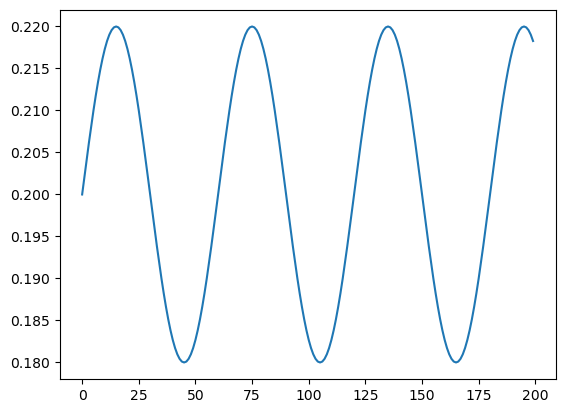

In [59]:
x = torch.arange(0, 200)
target_pattern = .02 * torch.sin((x * 4 * torch.pi) / 120) + .2
plt.plot(target_pattern)

In [60]:
optim = torch.optim.Adam(params=rnet.parameters(), lr=.001)
for gen in range(1000):
    rnet.past_states = []
    rnet = rnet.detach(reset_intrinsic=True)
    optim.zero_grad()
    for i in range(200):
        rnet()
    history = torch.stack(rnet.past_states)
    node_history = history[:, 2, 0, 0, 0].squeeze()
    loss = torch.sqrt(torch.sum((target_pattern - node_history) ** 2))
    print("gen", gen, "loss", loss)
    loss.backward()
    optim.step()

gen 0 loss tensor(54.8090, grad_fn=<SqrtBackward0>)
gen 1 loss tensor(54.3891, grad_fn=<SqrtBackward0>)
gen 2 loss tensor(53.6121, grad_fn=<SqrtBackward0>)
gen 3 loss tensor(53.0261, grad_fn=<SqrtBackward0>)
gen 4 loss tensor(52.3345, grad_fn=<SqrtBackward0>)
gen 5 loss tensor(51.4798, grad_fn=<SqrtBackward0>)
gen 6 loss tensor(50.4243, grad_fn=<SqrtBackward0>)
gen 7 loss tensor(49.1130, grad_fn=<SqrtBackward0>)
gen 8 loss tensor(47.6298, grad_fn=<SqrtBackward0>)
gen 9 loss tensor(44.8075, grad_fn=<SqrtBackward0>)
gen 10 loss tensor(34.9338, grad_fn=<SqrtBackward0>)
gen 11 loss tensor(12.8634, grad_fn=<SqrtBackward0>)
gen 12 loss tensor(9.3115, grad_fn=<SqrtBackward0>)
gen 13 loss tensor(7.1372, grad_fn=<SqrtBackward0>)
gen 14 loss tensor(29.0466, grad_fn=<SqrtBackward0>)
gen 15 loss tensor(19.4720, grad_fn=<SqrtBackward0>)
gen 16 loss tensor(10.6750, grad_fn=<SqrtBackward0>)
gen 17 loss tensor(14.3415, grad_fn=<SqrtBackward0>)
gen 18 loss tensor(39.9216, grad_fn=<SqrtBackward0>)
gen 1

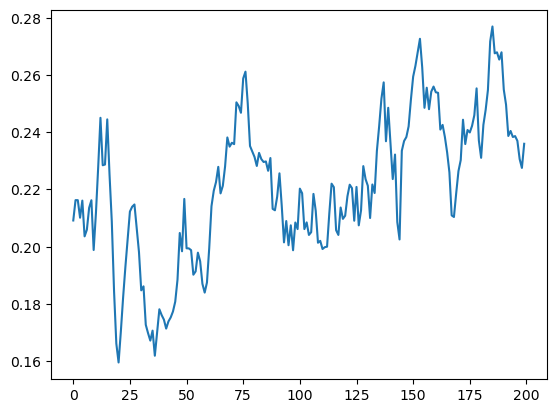

In [71]:
plt.plot(history[0:, 2, 0, 0, 0].detach().numpy())

In [77]:
print(rnet.edge.plasticity.detach().numpy())

[[0.19267683 0.23076288 0.09133983]
 [0.19426115 0.21450217 0.20033336]
 [0.17447603 0.23200636 0.14890973]]


In [78]:
print(rnet.edge.chan_map.detach().numpy())

[[[[ 0.18597959  0.12710507  0.11488964]
   [-0.10236885 -0.03929833 -0.01927421]
   [-0.01052637  0.37194204  0.17801291]]

  [[ 0.00261291  0.07007036 -0.11448629]
   [ 0.338455   -0.01860324 -0.0098422 ]
   [-0.39300126 -0.10874406 -0.2461994 ]]

  [[-0.08439389  0.11572049 -0.03859488]
   [-0.13949992  0.152423   -0.2865126 ]
   [ 0.14633566 -0.0398538   0.3294573 ]]]


 [[[ 0.3101045   0.1715042   0.15268293]
   [-0.146623   -0.13303629 -0.357589  ]
   [-0.1611741   0.01523073 -0.05701126]]

  [[ 0.09396408  0.09825215  0.15612225]
   [ 0.08325808 -0.25508758 -0.01783137]
   [-0.06626071  0.31653017  0.3732822 ]]

  [[-0.25453684 -0.28046304 -0.12434094]
   [ 0.15290214  0.25560758  0.16180284]
   [ 0.00748221  0.16048333 -0.09319084]]]


 [[[ 0.15595129 -0.09351923 -0.0750739 ]
   [ 0.19186796  0.05804086  0.04879548]
   [-0.09478863  0.00800803  0.17425099]]

  [[ 0.08704688  0.42037717  0.06679372]
   [ 0.18670727 -0.17593166  0.03969372]
   [-0.04416563 -0.3568869   0.25636813

In [82]:
print(torch.linalg.inv(rnet.edge.chan_map.detach()).numpy())

[[[[ -0.08461952  -9.81863     -1.0084908 ]
   [ -8.998171   -16.758099     3.9929547 ]
   [ 18.79587     34.43395     -2.7849865 ]]

  [[  0.31422818   2.6590745   -0.25242126]
   [  7.806445    -4.0857563   -3.4667757 ]
   [ -3.9496303   -2.4399648   -2.1275716 ]]

  [[-17.95021     16.927073    12.617822  ]
   [ -1.8655443   10.250759     8.696033  ]
   [  7.747307    -6.278515    -1.5172448 ]]]


 [[[  1.4679397    1.3634266   -4.620438  ]
   [  5.550851     0.78056586   9.969932  ]
   [ -2.6670234   -3.6459546   -1.8146535 ]]

  [[  9.067473    -1.2897989   -3.8540099 ]
   [  3.0264132   -4.597727    -1.4854023 ]
   [ -0.9567399    3.6697605    3.2543886 ]]

  [[ -9.013781    -8.344684    -2.461739  ]
   [  2.7989373    4.4629645    4.014318  ]
   [  4.096323     7.0156527   -4.015288  ]]]


 [[[  2.1382594    3.451552    -0.04529504]
   [ -8.369789     4.4112563   -4.841305  ]
   [  1.5478146    1.6748391    5.9367003 ]]

  [[  1.0847011    4.6144123   -0.99706006]
   [  1.739712